# Stock Forecasting Project 0.2
*by JackDeBuff*

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


**Data Retrieving Zone**

In [0]:
from pandas_datareader import data as pdr
import pandas as pd
import matplotlib.pyplot as plt
import time
from datetime import date
import urllib
from bs4 import BeautifulSoup
from time import sleep
import copy

today = date.today()
today = '2019-10-15'
print("Today's date:", today)

Today's date: 2019-10-15


In [0]:
def retrieve(name,start,end,typeof,amount):
  try:
      data = pdr.get_data_yahoo(name, start=start, end=end)
      #print(data.head(10))
      x = list(data[typeof])[-amount:]
      return x
  except:
      print("Error:", sys.exc_info()[0])
      print("Description:", sys.exc_info()[1])

In [0]:
stock_name_list = []

url = 'https://www.settrade.com/C13_MarketSummary.jsp?detail=SETHD'
html = urllib.request.urlopen(url).read() 
soup = BeautifulSoup(html, 'html.parser')
fuck = soup.find('html').find_next('html').find_all('tr')

for i in range(1,31):
  name = fuck[i].a.text + '.BK'
  stock_name_list.append(name)
print(stock_name_list)

#change name list
stock_name_list = ["INTUCH.BK","JMT.BK","KKP.BK","TCAP.BK","LH.BK","PTT.BK","PTTGC.BK","RATCH.BK","TTW.BK","TVO.BK"]

['ADVANC.BK', 'ANAN.BK', 'AP.BK', 'BCP.BK', 'BEAUTY.BK', 'BLAND.BK', 'HANA.BK', 'INTUCH.BK', 'IRPC.BK', 'JMT.BK', 'KCE.BK', 'KKP.BK', 'KTB.BK', 'LH.BK', 'MAJOR.BK', 'ORI.BK', 'PTT.BK', 'PTTGC.BK', 'QH.BK', 'RATCH.BK', 'SCB.BK', 'SCC.BK', 'SGP.BK', 'SIRI.BK', 'SPRC.BK', 'TCAP.BK', 'TISCO.BK', 'TOP.BK', 'TTW.BK', 'TVO.BK']


**Data Control Centre**

In [0]:
from math import log10

"""Close = list(ptt['Close'])[-2000:]
print(Close[-10:])
print(len(Close))"""

startdate = "2013-01-01"
amount = 1601
count = 0

stock = []
stockref = []
for i in stock_name_list:
  High = retrieve(i,startdate,today,'High',amount)
  Low = retrieve(i,startdate,today,'Low',amount)
  Open = retrieve(i,startdate,today,'Open',amount)
  Close = retrieve(i,startdate,today,'Close',amount)
  Volume = retrieve(i,startdate,today,'Volume',amount)
  stock.append([])
  stockref.append([])
  for j in range(1,amount):
    #stock[stock_name_list.index(i)].append([Close[j],Volume[j]])
    a = log10(Close[j]/Close[j-1])
    if Volume[j] == 0.0:
      Volume[j] = Volume[j-1]
    b = log10(Volume[j]/Volume[j-1])
    stock[stock_name_list.index(i)].append([a,b])
    stockref[stock_name_list.index(i)].append([a])
  count += 1

print(len(Close))
print(Close)
print(len(stock[0]))
print(stock[0])

1601
[23.299999237060547, 23.0, 23.5, 23.600000381469727, 23.799999237060547, 23.899999618530273, 23.799999237060547, 23.5, 23.799999237060547, 23.299999237060547, 22.899999618530273, 22.600000381469727, 22.700000762939453, 22.5, 22.700000762939453, 22.899999618530273, 22.5, 22.600000381469727, 23.299999237060547, 23.5, 23.100000381469727, 22.799999237060547, 23.100000381469727, 23.0, 22.899999618530273, 23.0, 22.799999237060547, 22.700000762939453, 22.600000381469727, 22.600000381469727, 22.600000381469727, 21.899999618530273, 21.600000381469727, 21.5, 21.0, 20.600000381469727, 20.700000762939453, 20.600000381469727, 21.0, 21.399999618530273, 21.399999618530273, 21.0, 21.0, 20.899999618530273, 20.899999618530273, 20.700000762939453, 20.600000381469727, 20.799999237060547, 20.700000762939453, 20.399999618530273, 20.100000381469727, 20.0, 19.5, 19.100000381469727, 18.100000381469727, 18.299999237060547, 18.100000381469727, 18.0, 17.899999618530273, 17.700000762939453, 17.600000381469727

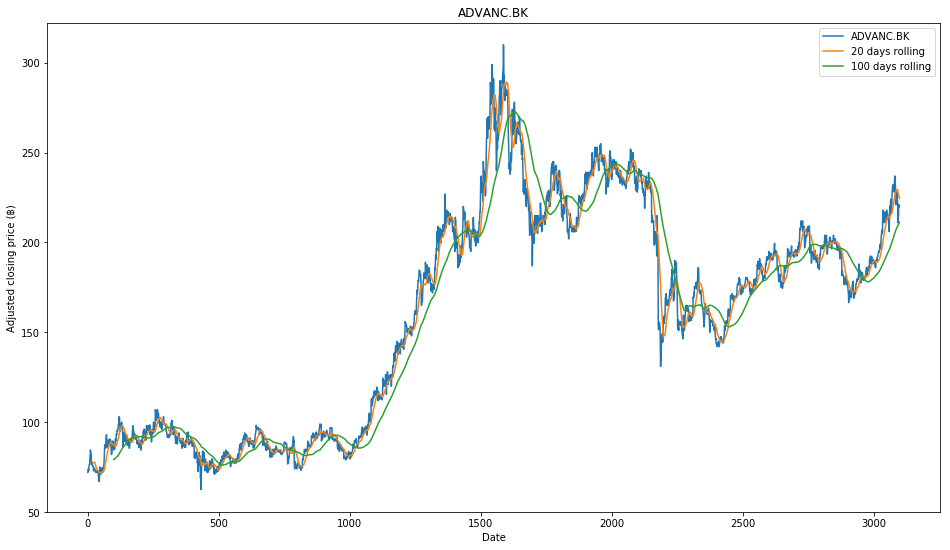

In [0]:
i = 'ADVANC.BK'
data = {'price': Close}
msft = pd.DataFrame(data)


  #msft = close.loc[:, 'MSFT']

  # Calculate the 20 and 100 days moving averages of the closing prices
short_rolling_msft = msft.rolling(window=20).mean()
  #print(list(short_rolling_msft['price']))
long_rolling_msft = msft.rolling(window=100).mean()


  # Plot everything by leveraging the very powerful matplotlib package
plt.figure(figsize=(16,9))
  #plt.subplots(figsize=(16,9))
plt.title(i)
plt.plot(msft.index, msft, label=i)
plt.plot(short_rolling_msft.index, short_rolling_msft, label='20 days rolling')
plt.plot(long_rolling_msft.index, long_rolling_msft, label='100 days rolling')

plt.xlabel('Date')
plt.ylabel('Adjusted closing price (฿)')
plt.legend()
plt.show()

In [0]:
"""or i in stock_name_list:
  Close = retrieve(i,startdate,today,'Close',amount)
  data = {'price': Close}

  msft = pd.DataFrame(data)


  #msft = close.loc[:, 'MSFT']

  # Calculate the 20 and 100 days moving averages of the closing prices
  short_rolling_msft = msft.rolling(window=20).mean()
  #print(list(short_rolling_msft['price']))
  long_rolling_msft = msft.rolling(window=100).mean()


  # Plot everything by leveraging the very powerful matplotlib package
  plt.figure(figsize=(16,9))
  #plt.subplots(figsize=(16,9))
  plt.title(i)
  plt.plot(msft.index, msft, label=i)
  plt.plot(short_rolling_msft.index, short_rolling_msft, label='20 days rolling')
  plt.plot(long_rolling_msft.index, long_rolling_msft, label='100 days rolling')

  plt.xlabel('Date')
  plt.ylabel('Adjusted closing price (฿)')
  plt.legend()
  plt.savefig('/content/drive/My Drive/Colab Notebooks/SETHD3000/'+i+'.png')"""

"or i in stock_name_list:\n  Close = retrieve(i,startdate,today,'Close',amount)\n  data = {'price': Close}\n\n  msft = pd.DataFrame(data)\n\n\n  #msft = close.loc[:, 'MSFT']\n\n  # Calculate the 20 and 100 days moving averages of the closing prices\n  short_rolling_msft = msft.rolling(window=20).mean()\n  #print(list(short_rolling_msft['price']))\n  long_rolling_msft = msft.rolling(window=100).mean()\n\n\n  # Plot everything by leveraging the very powerful matplotlib package\n  plt.figure(figsize=(16,9))\n  #plt.subplots(figsize=(16,9))\n  plt.title(i)\n  plt.plot(msft.index, msft, label=i)\n  plt.plot(short_rolling_msft.index, short_rolling_msft, label='20 days rolling')\n  plt.plot(long_rolling_msft.index, long_rolling_msft, label='100 days rolling')\n\n  plt.xlabel('Date')\n  plt.ylabel('Adjusted closing price (฿)')\n  plt.legend()\n  plt.savefig('/content/drive/My Drive/Colab Notebooks/SETHD3000/'+i+'.png')"

In [0]:
from numpy import array
from keras.models import Sequential,load_model
from keras.layers import LSTM,Conv1D
from keras.layers import Dense,Dropout,MaxPooling1D,Flatten
from keras.callbacks import EarlyStopping, ModelCheckpoint
import time
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0, 1))
train = sc.fit_transform(stock[1])

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-time_stamps:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:end_ix+time_stamps]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), y

time_stamps = 10

# define input sequence
# Close = [i[0] for i in Close]
raw_seq = train
#print(raw_seq)
# choose a number of time steps
n_steps = 100
# split into samples
X, y = split_sequence(raw_seq, n_steps)
#print(y)
print(len(y))
newy = []
for i in range(len(y)):
	newy.append([])
	for j in y[i]:
		newy[i].append(j[0])
print(newy)
y = array(newy)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 2
X = X.reshape((X.shape[0], X.shape[1], n_features))
#y = y.reshape((y.shape[0], y.shape[1], n_features))
#print(X)

# define model

model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape=(n_steps, n_features)))
#model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
#model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
#model.add(Dropout(0.2))

model.add(LSTM(50))
#model.add(Dropout(0.2))

model.add(Dense(10))

"""
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(1491,n_steps, n_features)))
model.add(Dense(10,2))


model = Sequential()
model.add(Conv1D(filters=100, kernel_size=10, activation='relu', input_shape=(n_steps,n_features)))
model.add(Conv1D(filters=100, kernel_size=10, activation='relu'))
#model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=1))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10))"""


1491
[[0.4640153400153065, 0.5078877854358725, 0.40277231111096146, 0.456273717548492, 0.5206975577069286, 0.5384058896856485, 0.522760913123837, 0.47301390148051325, 0.4978590222597092, 0.5123734976726929], [0.5078877854358725, 0.40277231111096146, 0.456273717548492, 0.5206975577069286, 0.5384058896856485, 0.522760913123837, 0.47301390148051325, 0.4978590222597092, 0.5123734976726929, 0.5157443541549761], [0.40277231111096146, 0.456273717548492, 0.5206975577069286, 0.5384058896856485, 0.522760913123837, 0.47301390148051325, 0.4978590222597092, 0.5123734976726929, 0.5157443541549761, 0.5492196853787283], [0.456273717548492, 0.5206975577069286, 0.5384058896856485, 0.522760913123837, 0.47301390148051325, 0.4978590222597092, 0.5123734976726929, 0.5157443541549761, 0.5492196853787283, 0.5645609655466698], [0.5206975577069286, 0.5384058896856485, 0.522760913123837, 0.47301390148051325, 0.4978590222597092, 0.5123734976726929, 0.5157443541549761, 0.5492196853787283, 0.5645609655466698, 0.5075

"\nmodel = Sequential()\nmodel.add(LSTM(50, activation='relu', input_shape=(1491,n_steps, n_features)))\nmodel.add(Dense(10,2))\n\n\nmodel = Sequential()\nmodel.add(Conv1D(filters=100, kernel_size=10, activation='relu', input_shape=(n_steps,n_features)))\nmodel.add(Conv1D(filters=100, kernel_size=10, activation='relu'))\n#model.add(Dropout(0.5))\nmodel.add(MaxPooling1D(pool_size=1))\nmodel.add(Flatten())\nmodel.add(Dense(100, activation='relu'))\nmodel.add(Dense(10))"

In [0]:
start = time.time()
#model.compile(optimizer='adam', loss='mse')

model.compile(loss="mse", optimizer="adam", metrics=['accuracy','mse','mae','mape'])
# fit model
history = model.fit(X, y, epochs=100, verbose=1,validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss',
                                                                                                     min_delta=0,
                                                                                                     patience=5,
                                                                                                     verbose=1,
                                                                                                     mode='min'),ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)])
print("> Compilation Time : ", time.time() - start)
# demonstrate prediction

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 1192 samples, validate on 299 samples
Epoch 1/100





1192/1192 [==============================] - 39s 33ms/step - loss: 0.0584 - acc: 0.0956 - mean_squared_error: 0.0584 - mean_absolute_error: 0.1641 - mean_absolute_percentage_error: 267068.0485 - val_loss: 0.0012 - val_acc: 0.1104 - val_mean_squared_error: 0.0012 - val_mean_absolute_error: 0.0284 - val_mean_absolute_percentage_error: 5.6912
Epoch 2/100
1192/1192 [==============================] - 30s 25ms/step - loss: 0.0014 - acc: 0.0948 - mean_squared_error: 0.0014 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 424033.8252 - val_loss: 2.9880e-04 - val_acc: 0.1037 - val_mean_squared_error: 2.9880e-04 - val_mean_absolute_error: 0.0131 - val_mean_absolute_percentage_error: 2.6028
Epoch 3/100
1192/1192 [==============================] - 30s 25ms/step - loss: 0.0011 - acc: 0.1107 - mean_squared_error: 0.0011 - mean

dict_keys(['val_loss', 'val_acc', 'val_mean_squared_error', 'val_mean_absolute_error', 'val_mean_absolute_percentage_error', 'loss', 'acc', 'mean_squared_error', 'mean_absolute_error', 'mean_absolute_percentage_error'])


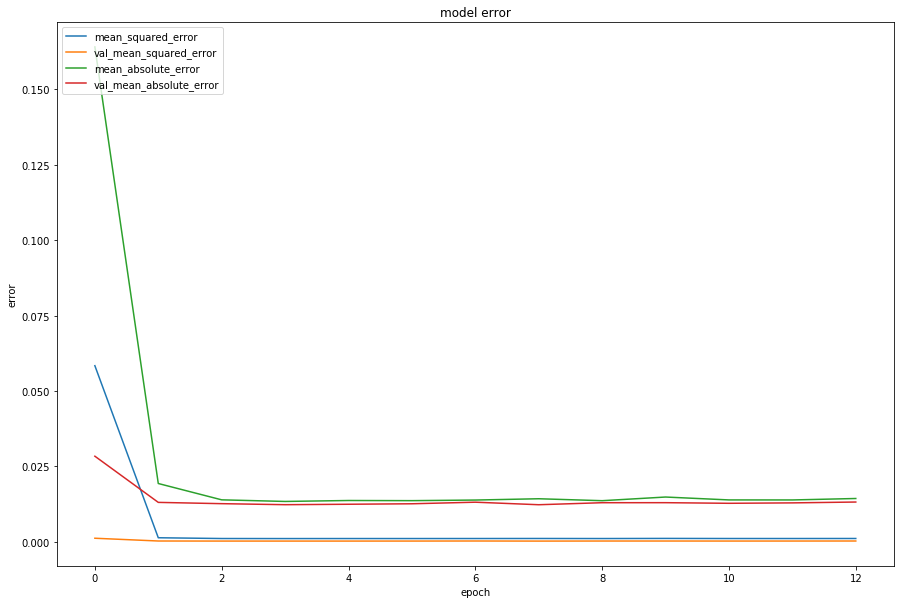

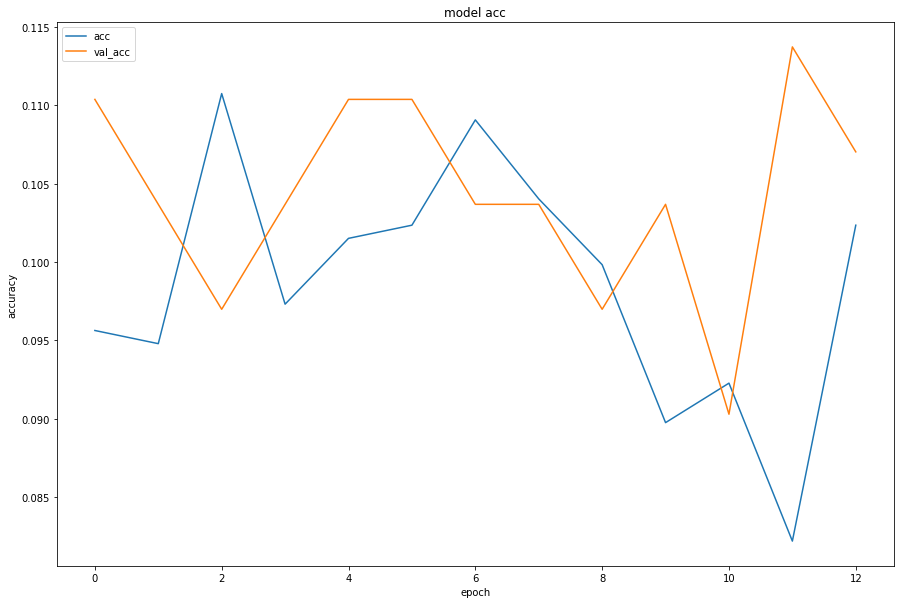

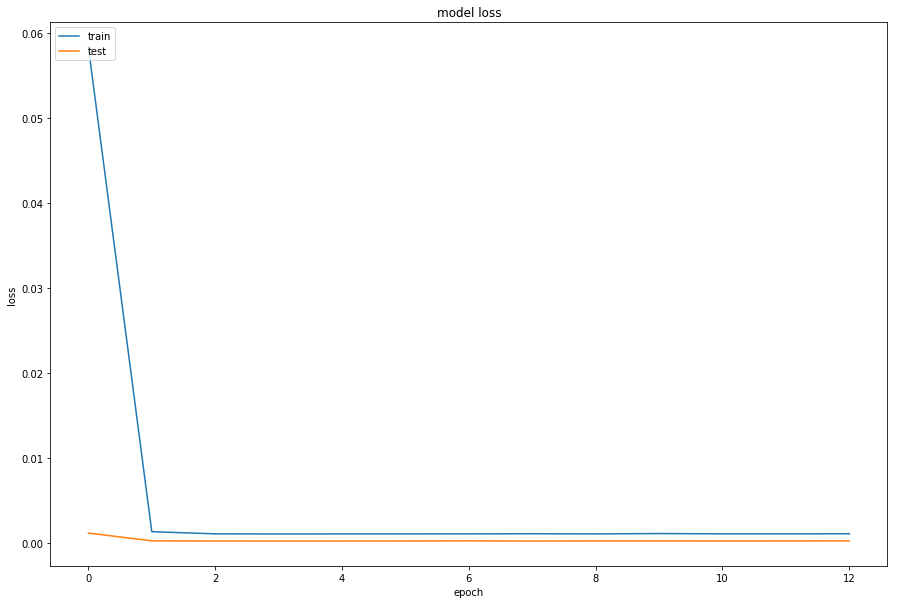

In [0]:
print(history.history.keys())
# summarize history for accuracy
plt.figure(figsize=(15,10))
#plt.plot(history.history['acc'])
#plt.plot(history.history['val_acc'])
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
#plt.plot(history.history['acc'])
#plt.plot(history.history['val_acc'])
plt.title('model error')
plt.ylabel('error')
plt.xlabel('epoch')
plt.legend(['mean_squared_error','val_mean_squared_error','mean_absolute_error','val_mean_absolute_error'], loc='upper left')
plt.show()

plt.figure(figsize=(15,10))
#plt.plot(history.history['acc'])
#plt.plot(history.history['val_acc'])
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model acc')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['acc','val_acc'], loc='upper left')
plt.show()

# summarize history for loss
plt.figure(figsize=(15,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Test1 Zone**

In [0]:
x_test = list()
print(len(Close))
for i in range(1500,1600,1):
  x_test.append(list(train[i:i+n_steps])) #100
x_input = array(x_test)
print(len(x_input))
#print((x_input))
x_input = x_input.reshape((100, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
#print(yhat)

1601
100


ValueError: ignored

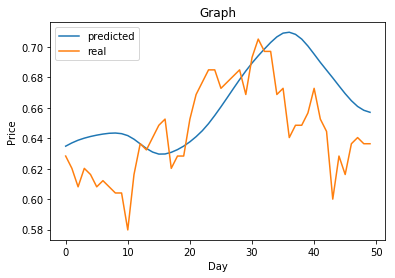

In [0]:
plt.plot([i[0] for i in yhat[-50:]])
plt.plot([i[0] for i in train[-50:]])
plt.title('Graph')
plt.ylabel('Price')
plt.xlabel('Day')
plt.legend(['predicted', 'real'], loc='upper left')
plt.show()

**Test2 Zone**

[[0.5013111  0.4998431  0.5012798  0.5059101  0.49549264 0.5028564
  0.4995126  0.5004141  0.5056033  0.50342256]]
Tomorrow's price of INTUCH.BK: [[-0.00011631]
 [-0.00101164]
 [-0.00013543]
 [ 0.00268852]
 [-0.0036649 ]
 [ 0.00082611]
 [-0.00121319]
 [-0.0006634 ]
 [ 0.00250142]
 [ 0.00117141]]


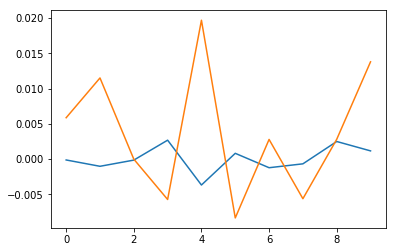

In [0]:
mx = MinMaxScaler(feature_range=(0,1))
testis = mx.fit_transform(stockref[1])
x_test = list()
x_test.append(train[-n_steps-100:-100])
x_input = array(x_test)
#print(len(x_input))
#print((x_input))
x_input = x_input.reshape((1, n_steps, n_features))
saved_model = load_model('best_model.h5')
yhat = saved_model.predict(x_input, verbose=0)
print(yhat)
#print("Close = "+str(Close[-1:]) )
#print("Open = "+str(Open[-1:]) )
#print("train = "+str(train[-1:]) )
#print(yhat[0])
#fuck = list(yhat[0])
#print([fuck])
yhat2 = [[i] for i in yhat[0]]

fuck = mx.inverse_transform(yhat2)
print("Tomorrow's price of "+stock_name_list[0]+ ": " + str(fuck))
plt.plot(fuck)
plt.plot(stockref[1][-100:-90])

**Tese3 Zone**

3100


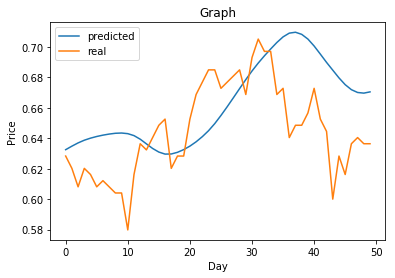

In [0]:
import numpy as np
x_test = list()
print(len(Close))
yhat2list= []
for i in range(1500,1600,1):
  if i < 2995:
    x_test = list()
    x_test.append(train[i:i+n_steps]) #100
    x_test = array(x_test)
    x_test = x_test.tolist()
    #print(x_test)
  else:
    x_test[0].pop(0)
    #yhat2 = yhat2.tolist()
    #print(yhat2[0])
    x_test[0].append(yhat2[0])
  x_input = array(x_test)
  x_input = x_input.reshape((1, n_steps, n_features))
  yhat2 = model.predict(x_input, verbose=0)
  yhat2list.append(yhat2)
#print(yhat2list)
#print((x_input))

#yhat = model.predict(x_input, verbose=0)
#print(yhat)


plt.plot([i[0][0] for i in yhat2list[-50:]])
plt.plot([i[0] for i in train[-50:]])
plt.title('Graph')
plt.ylabel('Price')
plt.xlabel('Day')
plt.legend(['predicted', 'real'], loc='upper left')
plt.show()